In [1]:
import numpy as np
import pandas as pd

In [2]:
def compute_fantasy_score(df):
    '''
    WINAMAX fantasy score (miss for now +/- : point marqué/encaissé par l'équipe lorsque le joueur est sur le terrain)
    :param df: DataFrame
    :return:
    Fantasy league points of each player and each game in a new DataFrame column
    '''
    # Shots
    three_succeed = df['3P']
    three_missed = df['3PA'] - three_succeed
    two_attemped = df['FGA'] - df['3PA']
    two_succeed = df['FG'] - three_succeed
    two_missed = two_attemped - two_succeed
    ft_succeed = df['FT']                       #free throw
    ft_missed = df['FTA'] - ft_succeed
    # Rebounds
    def_r = df['DRB'] #defensive
    off_r = df['ORB'] #offensive
    # Passes
    assists = df['AST']
    # Steals
    steals = df['STL']
    # Blocks
    blocks = df['BLK']
    # Turnover
    turnover = df['TOV']
    # Fouls
    fouls = df['PF']

    return two_succeed*2 + two_missed*(-0.5) + three_succeed*3 + three_missed*(-0.5) + ft_succeed + ft_missed*(-0.5) + def_r*0.75 + off_r + assists + steals*2 + blocks*2 + turnover*(-0.75) + fouls*(-0.5)

In [3]:
season21 = pd.read_csv('../../data/bbref-files/2021-22.csv')

In [4]:
season21['FG'] = pd.to_numeric(season21['FG'],errors='coerce')

In [5]:
def convert_min_to_float(val):
    try:
        minutes, seconds = map(int, val.split(':'))  
        return round(minutes + seconds / 60)  
    except (ValueError, AttributeError):
        return np.nan  # Handle invalid case (ex : NaN or wrong chain)


In [6]:
season21['MP'] = season21['MP'].apply(convert_min_to_float)


In [7]:
season21.head()

,Player,Date,Team,Against,Home,MP,FG,FGA,FG%,3P,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+/-,GameLink
0,Joe Harris,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,31.0,3.0,9.0,0.333,3.0,...,2.0,2.0,2.0,0.0,0.0,2.0,1.0,9.0,3.5,https://www.basketball-reference.com/boxscores...
1,James Harden,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,31.0,6.0,16.0,0.375,4.0,...,5.0,8.0,8.0,1.0,2.0,4.0,3.0,20.0,17.6,https://www.basketball-reference.com/boxscores...
2,Kevin Durant,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,30.0,13.0,25.0,0.520,3.0,...,11.0,11.0,4.0,0.0,2.0,1.0,2.0,32.0,24.2,https://www.basketball-reference.com/boxscores...
3,Nic Claxton,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,24.0,6.0,9.0,0.667,0.0,...,7.0,7.0,0.0,0.0,0.0,0.0,3.0,12.0,7.8,https://www.basketball-reference.com/boxscores...
4,Blake Griffin,October 19 2021,Brooklyn Nets,Milwaukee Bucks,0,23.0,2.0,5.0,0.400,0.0,...,4.0,5.0,0.0,1.0,0.0,1.0,1.0,6.0,4.8,https://www.basketball-reference.com/boxscores...


In [8]:
season21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28556 entries, 0 to 28555
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    28556 non-null  object 
 1   Date      28556 non-null  object 
 2   Team      28556 non-null  object 
 3   Against   28556 non-null  object 
 4   Home      28556 non-null  int64  
 5   MP        23832 non-null  float64
 6   FG        23832 non-null  float64
 7   FGA       23832 non-null  float64
 8   FG%       22646 non-null  float64
 9   3P        23832 non-null  float64
 10  3PA       23832 non-null  float64
 11  3P%       18693 non-null  float64
 12  FT        23832 non-null  float64
 13  FTA       23832 non-null  float64
 14  FT%       13117 non-null  float64
 15  ORB       23832 non-null  float64
 16  DRB       23832 non-null  float64
 17  TRB       23832 non-null  float64
 18  AST       23832 non-null  float64
 19  STL       23832 non-null  float64
 20  BLK       23832 non-null  fl

In [9]:
columns_to_delete = ['Date','Team','Against','FG%','3P%','FT%','TRB','PTS','GameLink']

In [10]:
season21_del = season21.drop(columns_to_delete, axis=1)
season21_del


,Player,Home,MP,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,+/-
0,Joe Harris,0,31.0,3.0,9.0,3.0,5.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,3.5
1,James Harden,0,31.0,6.0,16.0,4.0,8.0,4.0,4.0,3.0,5.0,8.0,1.0,2.0,4.0,3.0,17.6
2,Kevin Durant,0,30.0,13.0,25.0,3.0,7.0,3.0,6.0,0.0,11.0,4.0,0.0,2.0,1.0,2.0,24.2
3,Nic Claxton,0,24.0,6.0,9.0,0.0,0.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,3.0,7.8
4,Blake Griffin,0,23.0,2.0,5.0,0.0,1.0,2.0,2.0,1.0,4.0,0.0,1.0,0.0,1.0,1.0,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28551,Greg Monroe,1,12.0,1.0,1.0,0.0,0.0,2.0,5.0,3.0,1.0,2.0,0.0,0.0,0.0,2.0,5.5
28552,Nickeil Alexander-Walker,1,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.7
28553,Jared Butler,1,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.7
28554,Eric Paschall,1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.3


In [11]:
season21_del.isna().sum()

Player       0
Home         0
MP        4724
FG        4724
FGA       4724
3P        4724
3PA       4724
FT        4724
FTA       4724
ORB       4724
DRB       4724
AST       4724
STL       4724
BLK       4724
TOV       4724
PF        4724
+/-       4724
dtype: int64

In [12]:
season21_del.head(20)

,Player,Home,MP,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,+/-
0,Joe Harris,0,31.0,3.0,9.0,3.0,5.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,2.0,1.0,3.5
1,James Harden,0,31.0,6.0,16.0,4.0,8.0,4.0,4.0,3.0,5.0,8.0,1.0,2.0,4.0,3.0,17.6
2,Kevin Durant,0,30.0,13.0,25.0,3.0,7.0,3.0,6.0,0.0,11.0,4.0,0.0,2.0,1.0,2.0,24.2
3,Nic Claxton,0,24.0,6.0,9.0,0.0,0.0,0.0,3.0,0.0,7.0,0.0,0.0,0.0,0.0,3.0,7.8
4,Blake Griffin,0,23.0,2.0,5.0,0.0,1.0,2.0,2.0,1.0,4.0,0.0,1.0,0.0,1.0,1.0,4.8
5,Patty Mills,0,29.0,7.0,11.0,7.0,7.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,1.0,19.4
6,James Johnson,0,21.0,0.0,2.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,0.1
7,Jevon Carter,0,19.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,1.0,-2.9
8,LaMarcus Aldridge,0,16.0,0.0,2.0,0.0,0.0,1.0,4.0,0.0,3.0,1.0,0.0,1.0,1.0,2.0,-1.1
9,Paul Millsap,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,1.0,0.0,1.0


In [13]:
season21_del.fillna(0, inplace=True)

In [14]:
season21_del['FP'] = season21_del.apply(compute_fantasy_score,axis=1)

In [15]:
player = 'Jordan Clarkson'
df_player = season21_del[season21_del['Player'] == player]

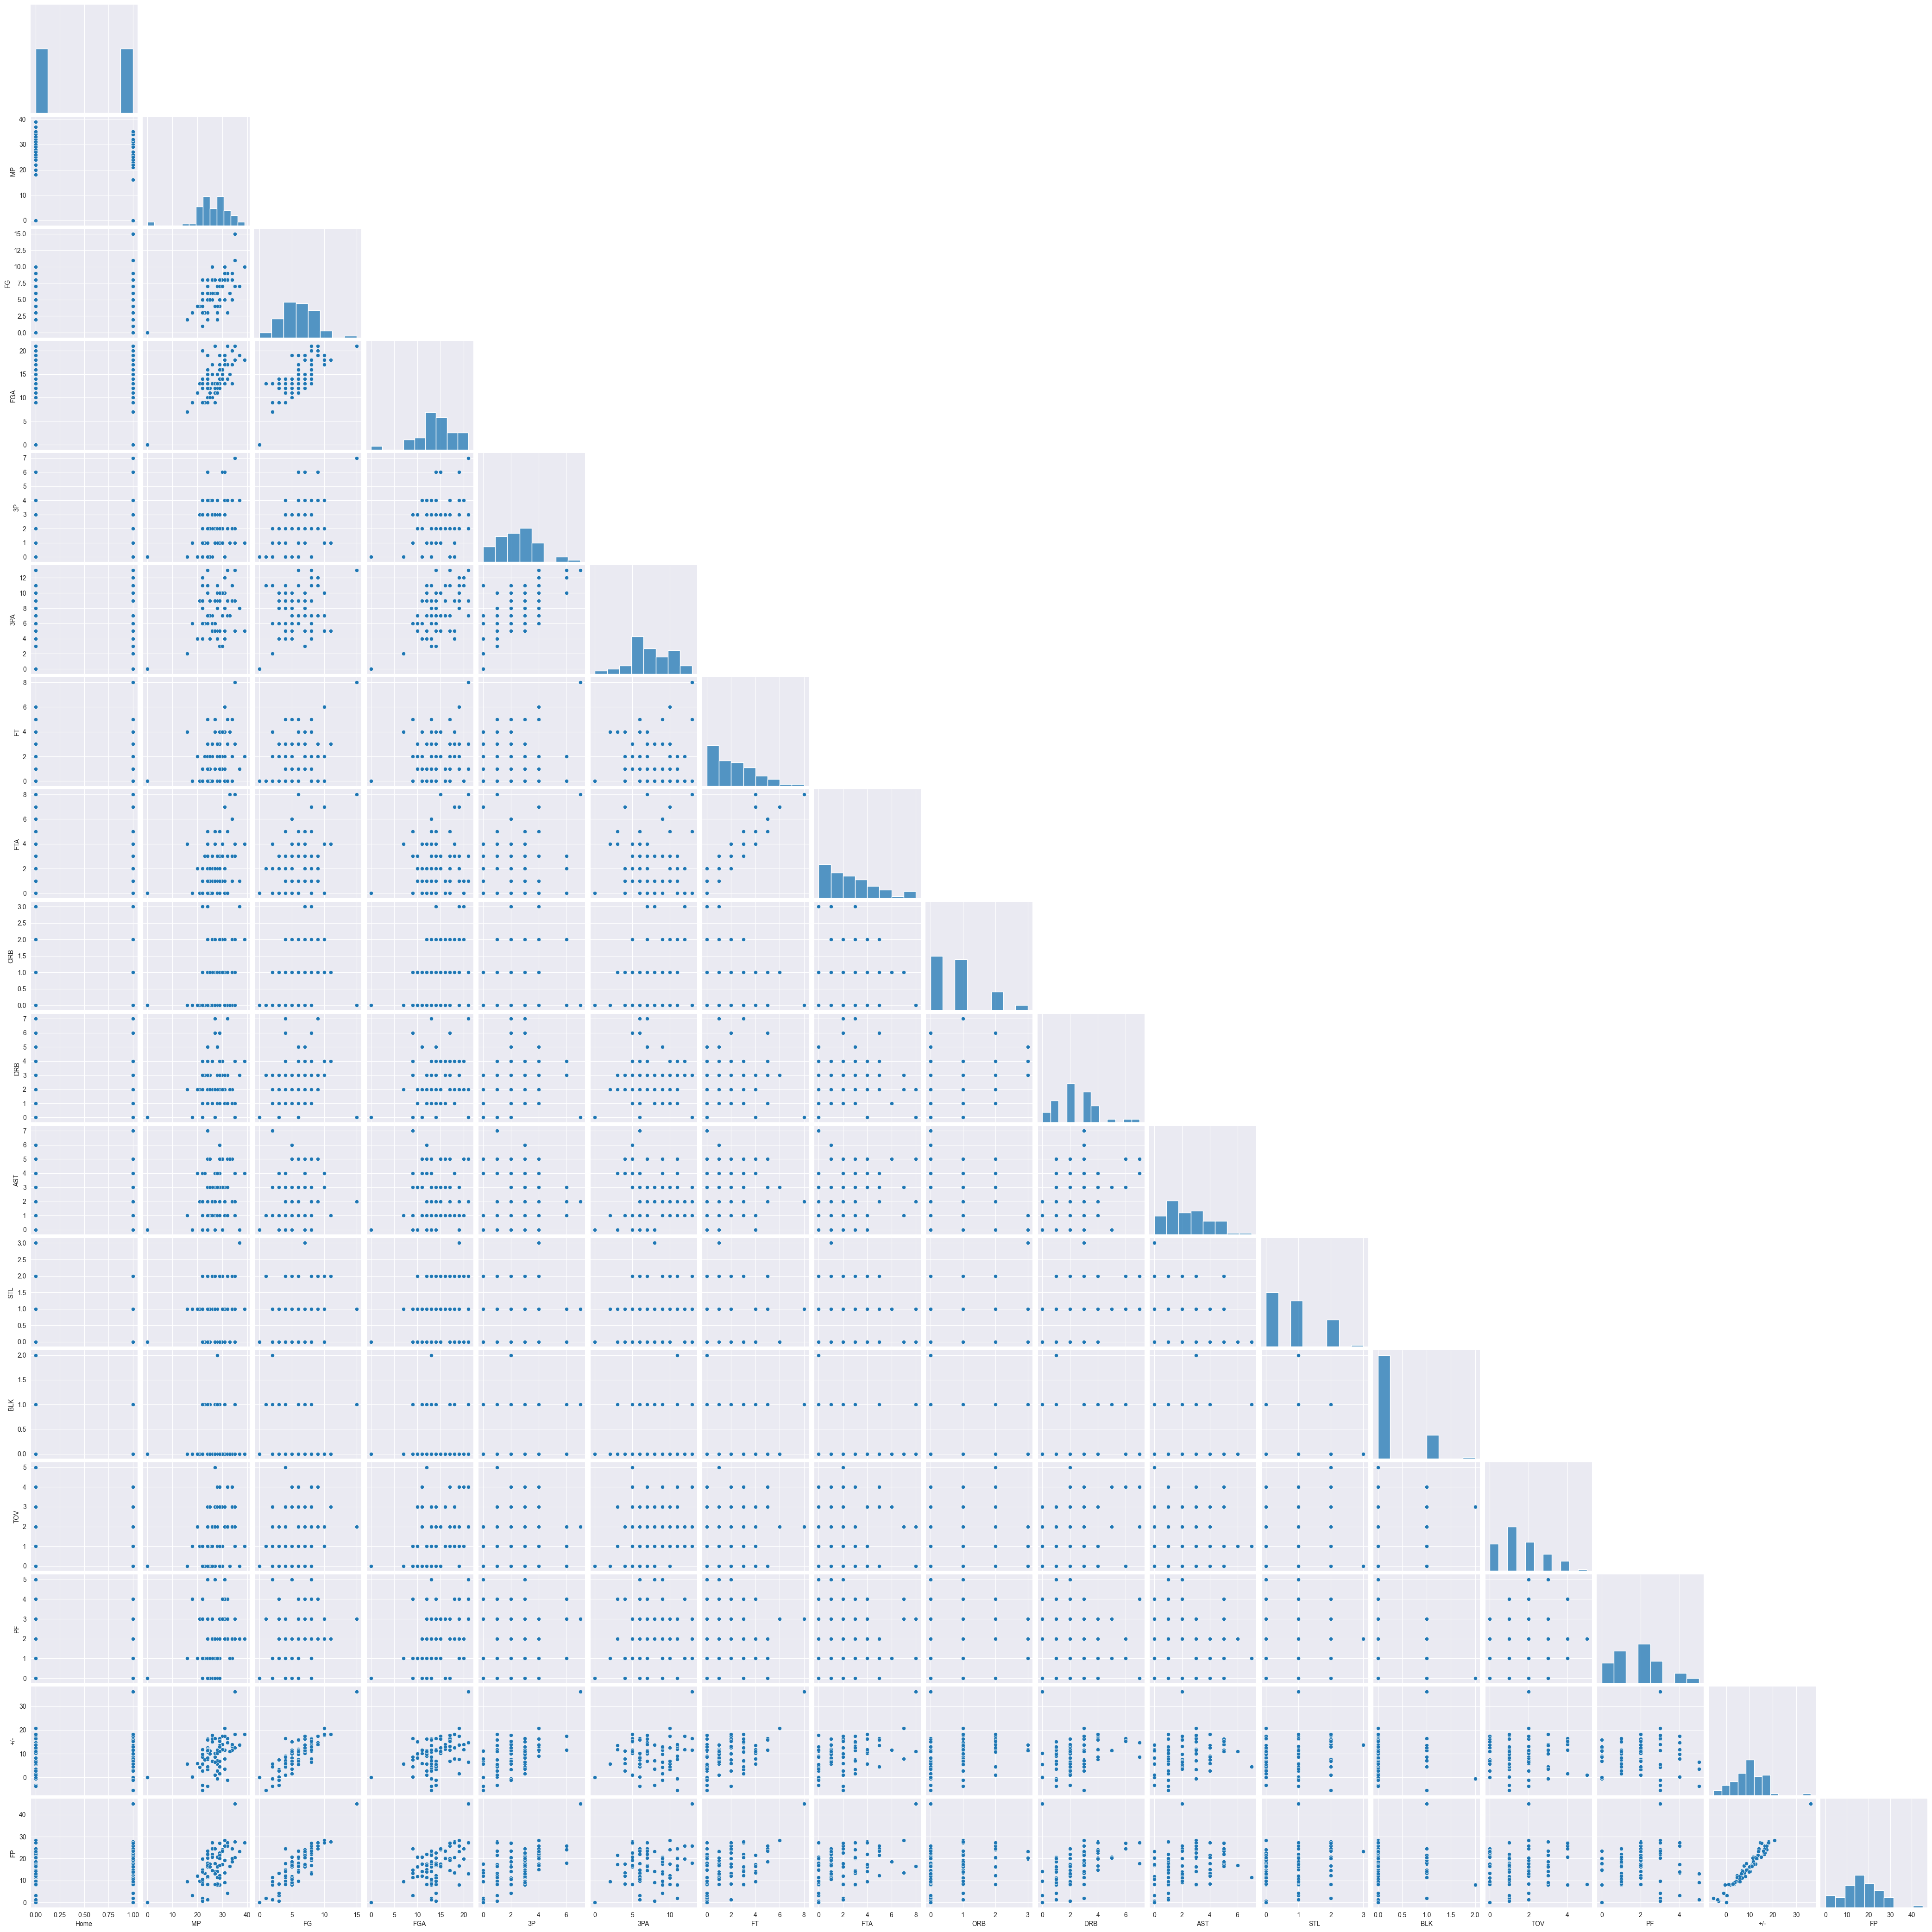

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer le pair plot
pairplot = sns.pairplot(df_player, corner=True)

# Sauvegarder le plot
pairplot.savefig('pairplot.png', dpi=300, bbox_inches='tight')

In [16]:
df_player.head(10)

,Player,Home,MP,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,+/-,FP
282,Jordan Clarkson,1,27.0,6.0,11.0,2.0,6.0,4.0,4.0,1.0,0.0,1.0,0.0,0.0,3.0,2.0,10.3,14.25
673,Jordan Clarkson,0,24.0,6.0,19.0,2.0,11.0,1.0,1.0,1.0,4.0,2.0,2.0,0.0,1.0,2.0,7.6,16.75
1423,Jordan Clarkson,1,24.0,7.0,15.0,3.0,10.0,2.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,12.5,17.50
1760,Jordan Clarkson,0,24.0,6.0,16.0,3.0,11.0,1.0,1.0,2.0,4.0,3.0,1.0,0.0,1.0,0.0,11.9,20.25
2160,Jordan Clarkson,0,29.0,5.0,19.0,3.0,9.0,3.0,3.0,0.0,2.0,1.0,0.0,0.0,4.0,1.0,1.6,8.00
2377,Jordan Clarkson,0,26.0,6.0,17.0,0.0,7.0,3.0,3.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,6.8,14.50
2761,Jordan Clarkson,1,22.0,1.0,13.0,0.0,11.0,0.0,2.0,0.0,3.0,1.0,2.0,1.0,1.0,3.0,-5.4,2.00
3148,Jordan Clarkson,0,31.0,10.0,19.0,4.0,10.0,6.0,7.0,1.0,3.0,3.0,0.0,0.0,2.0,3.0,20.8,28.25
3515,Jordan Clarkson,0,18.0,3.0,9.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,0.3,3.25
3696,Jordan Clarkson,0,28.0,2.0,13.0,2.0,11.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,3.0,0.0,-0.5,8.00


In [17]:
df_player.describe()

,Home,MP,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,AST,STL,BLK,TOV,PF,+/-,FP
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000
mean,0.500000,26.381579,5.802632,13.855263,2.342105,7.368421,1.763158,2.144737,0.802632,2.486842,2.276316,0.815789,0.210526,1.565789,1.881579,9.726316,16.375000
std,0.503322,6.250263,2.617988,3.955432,1.545338,2.865157,1.750188,2.050717,0.832982,1.536172,1.701753,0.811756,0.441687,1.257887,1.316228,6.620219,7.961627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.400000,0.000000
25%,0.000000,24.000000,4.000000,12.000000,1.000000,5.750000,0.000000,0.000000,0.000000,1.750000,1.000000,0.000000,0.000000,1.000000,1.000000,5.775000,11.437500
50%,0.500000,27.000000,6.000000,14.000000,2.000000,7.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,1.000000,2.000000,10.850000,16.875000
75%,1.000000,30.000000,8.000000,17.000000,3.000000,9.250000,3.000000,3.000000,1.000000,3.000000,3.000000,1.000000,0.000000,2.000000,3.000000,13.750000,21.625000
max,1.000000,39.000000,15.000000,21.000000,7.000000,13.000000,8.000000,8.000000,3.000000,7.000000,7.000000,3.000000,2.000000,5.000000,5.000000,36.200000,45.000000


In [18]:
y = df_player['FP']
X = df_player.drop(['Player','FP'],axis=1)

In [19]:
def get_averages(df,num_games): 
    from tqdm import tqdm 
    '''This function calculates the average for a specified amount of previous games. 
    It also formats the predictive value (next FP scored) for the NN model'''
    
    #col = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 
    #       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '+/-', 'FDP', 'FDS']
    
    col = ['MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA',
           'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', '+/-', 'FP']
    
    add_col = [f'{num_games}_{i}' for i in col] + ['NFP']
    print(add_col)
    new_df_list = []
    
    player_list = df['Player'].unique()
    for player in tqdm(player_list):
        #player_df = df[df['Name'] == player].sort_values(by='Date').copy()
        player_df = df.copy()
        # Colonne NFP avec shift
        player_df['NFP'] = player_df['FP'].shift(-1)
        # Ajouter les moyennes avec rolling
        for c in col:
            player_df[f'{num_games}_{c}'] = player_df[c].rolling(window=num_games, min_periods=num_games).mean()
        
        #new_df_list.append(player_df)
        return player_df

In [20]:
new_df = get_averages(df_player,num_games=2)

['2_MP', '2_FG', '2_FGA', '2_3P', '2_3PA', '2_FT', '2_FTA', '2_ORB', '2_DRB', '2_AST', '2_STL', '2_BLK', '2_TOV', '2_PF', '2_+/-', '2_FP', 'NFP']


  0%|          | 0/1 [00:00<?, ?it/s]

a
b
c


In [21]:
new_df.head()

,Player,Home,MP,FG,FGA,3P,3PA,FT,FTA,ORB,...,2_FTA,2_ORB,2_DRB,2_AST,2_STL,2_BLK,2_TOV,2_PF,2_+/-,2_FP
282,Jordan Clarkson,1,27.0,6.0,11.0,2.0,6.0,4.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673,Jordan Clarkson,0,24.0,6.0,19.0,2.0,11.0,1.0,1.0,1.0,...,2.5,1.0,2.0,1.5,1.0,0.0,2.0,2.0,8.95,15.500
1423,Jordan Clarkson,1,24.0,7.0,15.0,3.0,10.0,2.0,2.0,1.0,...,1.5,1.0,3.0,1.5,1.0,0.0,0.5,2.0,10.05,17.125
1760,Jordan Clarkson,0,24.0,6.0,16.0,3.0,11.0,1.0,1.0,2.0,...,1.5,1.5,3.0,2.0,0.5,0.0,0.5,1.0,12.20,18.875
2160,Jordan Clarkson,0,29.0,5.0,19.0,3.0,9.0,3.0,3.0,0.0,...,2.0,1.0,3.0,2.0,0.5,0.0,2.5,0.5,6.75,14.125


/var/folders/vh/q3b7qf717634p8s0g3jwqjrr0000gn/T/ipykernel_1455/2066528016.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, bins = 10) #plot distributions


Text(0.5, 1.0, 'Distribution of Fantasy Points - Jordan Clarkson')

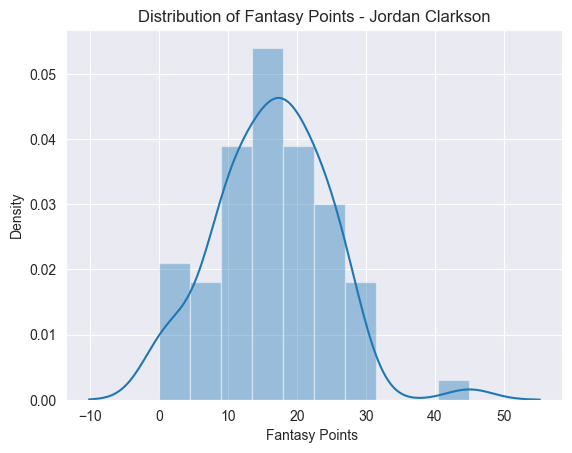

In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

col = ['MP', 'FG', 'FGA', '3P', '3PA',
        'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', '+/-', 'FP']   #columns used as input

num_games = 2
full_df = new_df.dropna()
x_col = [f'{num_games}_{i}' for i in col] 
X = np.array(full_df[[i for i in x_col]])
y = np.array(full_df[['FP']])

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = .8)

sns.distplot(y, bins = 10) #plot distributions
plt.xlabel(f'Fantasy Points '); plt.title(f'Distribution of Fantasy Points - {player}')

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    """
    Train a regression model, evaluate it on test data, and plot key metrics.
    
    Parameters:
    - model: Trained regression model
    - X_train: Training features
    - y_train: Training target
    - X_test: Test features
    - y_test: Test target
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate Metrics
    metrics = {
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Train MSE': mean_squared_error(y_train, y_train_pred),
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Train RMSE': root_mean_squared_error(y_train, y_train_pred),
        'Test RMSE': root_mean_squared_error(y_test, y_test_pred),
        'Train R²': r2_score(y_train, y_train_pred),
        'Test R²': r2_score(y_test, y_test_pred),
    }
    
    # Print Metrics
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    # Plot Predictions vs Actual
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Training Set
    sns.scatterplot(x=y_train, y=y_train_pred, ax=axes[0], color='blue', alpha=0.6)
    axes[0].plot(y_train, y_train, color='red', lw=2)  # Perfect fit line
    axes[0].set_title('Train: Actual vs Predicted')
    axes[0].set_xlabel('Actual Values')
    axes[0].set_ylabel('Predicted Values')
    
    # Test Set
    sns.scatterplot(x=y_test, y=y_test_pred, ax=axes[1], color='green', alpha=0.6)
    axes[1].plot(y_test, y_test, color='red', lw=2)  # Perfect fit line
    axes[1].set_title('Test: Actual vs Predicted')
    axes[1].set_xlabel('Actual Values')
    axes[1].set_ylabel('Predicted Values')
    
    plt.tight_layout()
    plt.show()
    
    # Plot Residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(y_test - y_test_pred, kde=True, color='purple', bins=30)
    plt.title('Residuals Distribution')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

[[24.     7.5   15.     2.     6.5    0.5    0.5    0.5    2.5    1.5
   1.5    0.    11.85  18.875]
 [23.5    5.    10.5    2.     6.5    2.5    3.5    0.     3.     4.5
   0.     0.5   11.85  17.625]
 [31.     8.5   18.5    2.     7.     2.     2.     1.     5.     5.
   2.     0.    14.25  25.375]
 [31.     5.5   15.     1.5    7.     2.     2.5    2.     1.5    2.
   1.     0.5    6.8   14.375]
 [29.5    5.5   15.     2.     4.5    1.5    1.5    1.     2.5    2.5
   0.     0.5    7.15  13.875]
 [29.5   11.    17.5    4.5   10.     4.5    5.5    1.5    2.5    1.
   1.     1.    23.75  32.625]
 [28.     7.5   14.     5.     8.     1.     2.     1.5    3.     2.
   0.5    0.    16.85  23.   ]
 [31.     5.5   13.5    2.     6.     2.5    4.5    0.     2.5    5.5
   0.     0.    10.95  16.75 ]
 [25.5    4.    11.5    2.     8.     1.5    2.5    1.5    3.     1.5
   1.     0.5    6.6   13.5  ]
 [25.5    3.    11.     2.     6.     0.5    1.     0.5    5.     5.5
   0.5    0.5    6.65  14

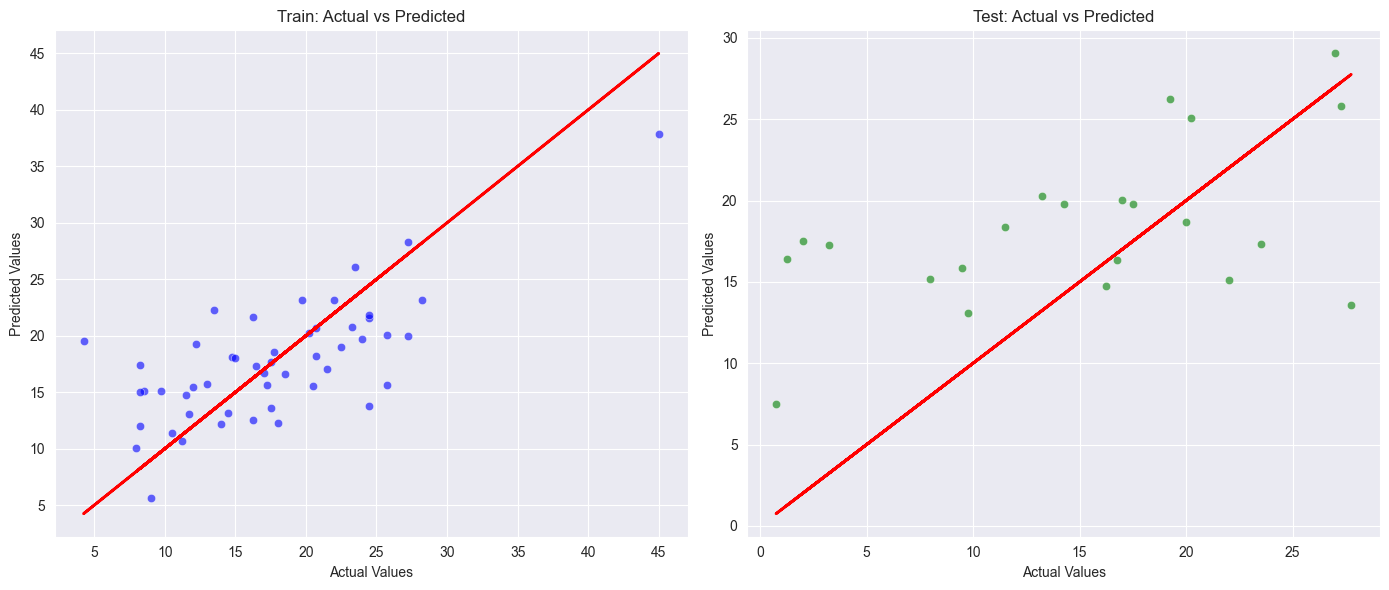

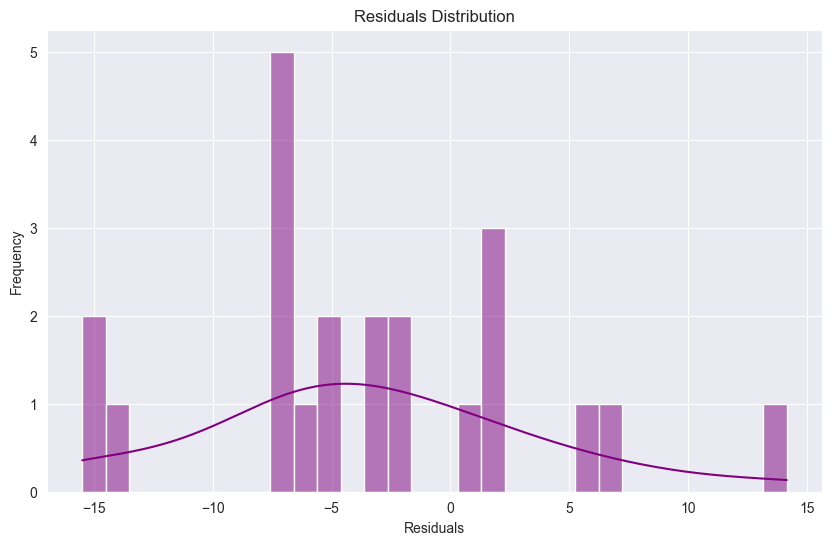

In [46]:
from sklearn.linear_model import LinearRegression

full_df = full_df[full_df.FP != 0]

col = ['MP', 'FG', 'FGA', '3P', '3PA',
        'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', '+/-', 'FP']   #columns used as input
x_col = [f'{num_games}_{i}' for i in col] 
X = np.array(full_df[[i for i in x_col]])
y = np.array(full_df[['FP']])

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = .7)

y_train = y_train.ravel()
y_test = y_test.ravel()

#initialize object
linear = LinearRegression()

evaluate_regression_model(linear, x_train, y_train, x_test, y_test)

y_train_pred shape: (50,)
y_test_pred shape: (22,)
Train MAE: 3.8789
Test MAE: 5.8062
Train MSE: 24.9949
Test MSE: 56.4969
Train RMSE: 4.9995
Test RMSE: 7.5164
Train R²: 0.4683
Test R²: 0.2859


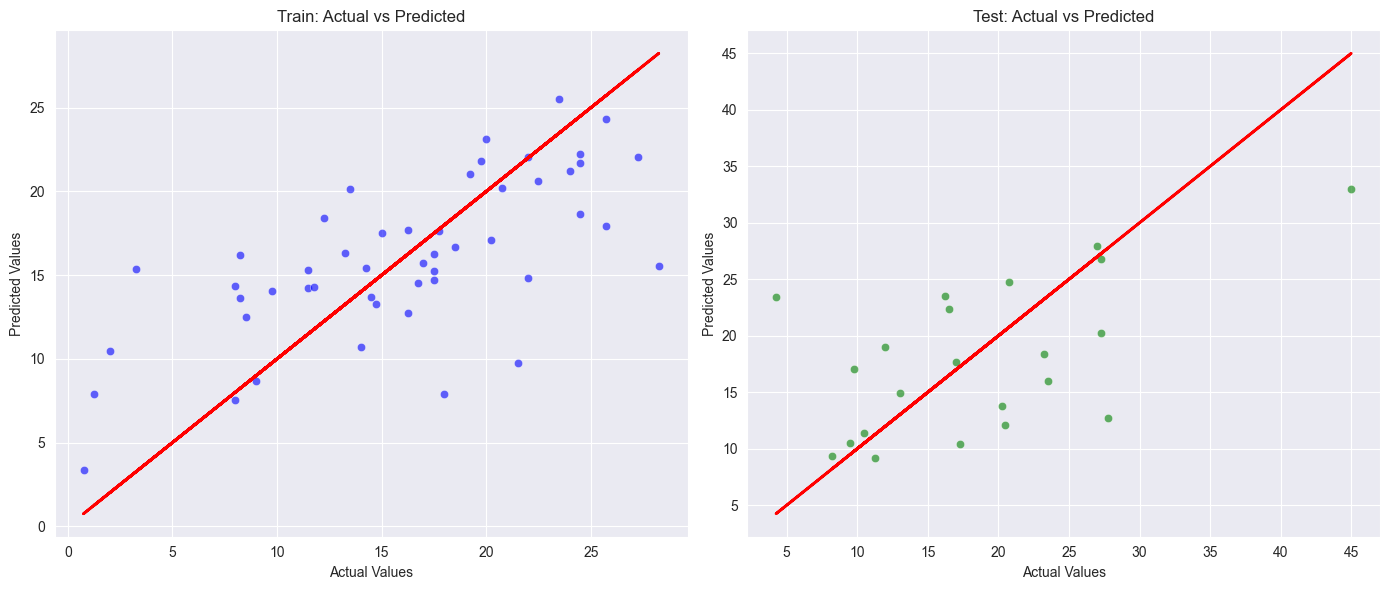

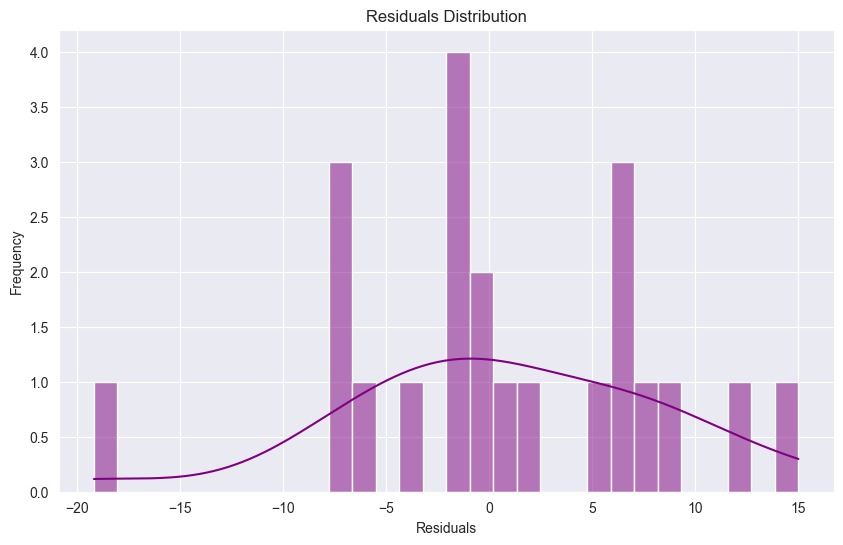

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = .7,shuffle=False)

y_train = y_train.ravel()
y_test = y_test.ravel()

#initialize object
linear = LinearRegression()

evaluate_regression_model(linear, x_train, y_train, x_test, y_test)

y_train_pred shape: (50,)
y_test_pred shape: (22,)
Train MAE: 4.1268
Test MAE: 5.4419
Train MSE: 26.9993
Test MSE: 52.4505
Train RMSE: 5.1961
Test RMSE: 7.2423
Train R²: 0.4257
Test R²: 0.3370


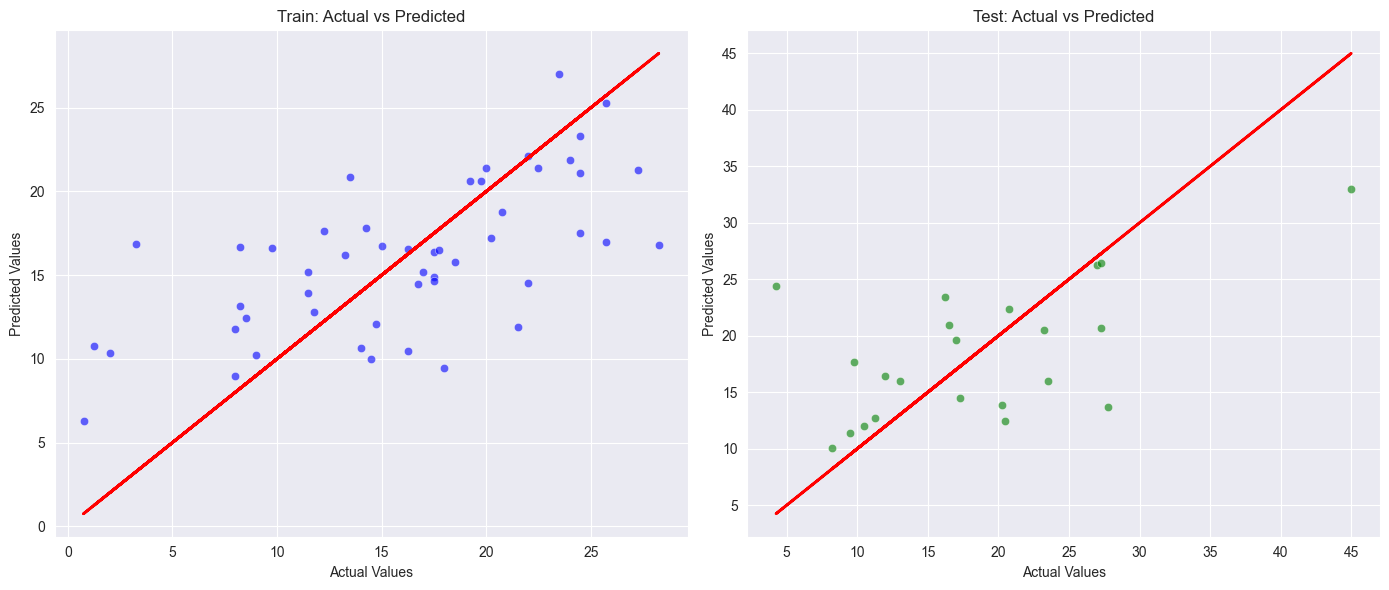

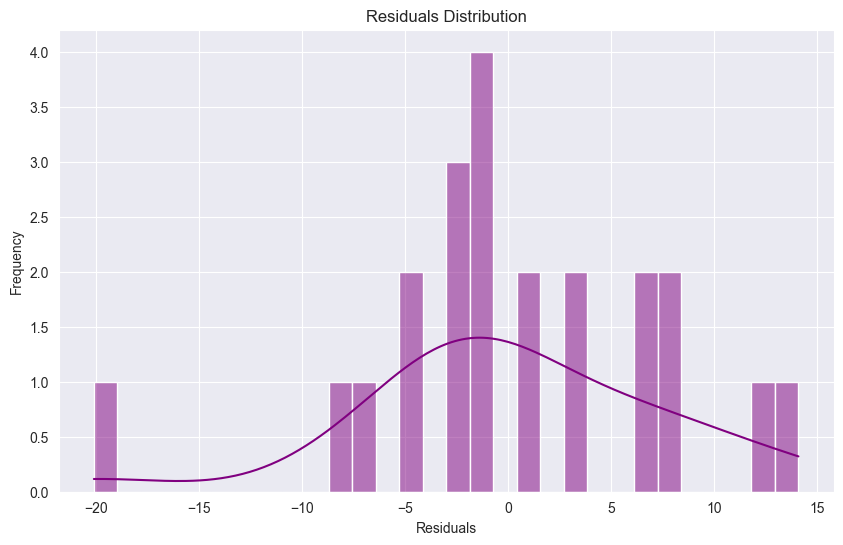

In [38]:
col = ['MP', 'FG', 'FGA', '3P', '3PA',
        'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', '+/-']   #columns used as input
x_col = [f'{num_games}_{i}' for i in col] 
X = np.array(full_df[[i for i in x_col]])
y = np.array(full_df[['FP']])

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = .7,shuffle=False)

y_train = y_train.ravel()
y_test = y_test.ravel()

#initialize object
linear = LinearRegression()

evaluate_regression_model(linear, x_train, y_train, x_test, y_test)

[[0.6744186  0.53846154 0.66666667 0.4        0.6        0.625
  0.55555556 0.5        0.23076923 0.27272727 0.5        0.
  0.5339233 ]
 [0.60465116 0.61538462 0.81481481 0.5        0.8        0.375
  0.33333333 0.5        0.38461538 0.27272727 0.5        0.
  0.59882006]
 [0.60465116 0.61538462 0.7037037  0.6        0.8        0.375
  0.33333333 0.75       0.38461538 0.36363636 0.25       0.
  0.72566372]
 [0.72093023 0.46153846 0.85185185 0.6        0.75       0.5
  0.44444444 0.5        0.38461538 0.36363636 0.25       0.
  0.40412979]
 [0.76744186 0.46153846 0.88888889 0.3        0.55       0.75
  0.66666667 0.         0.23076923 0.18181818 0.5        0.
  0.25368732]
 [0.60465116 0.15384615 0.66666667 0.         0.65       0.375
  0.55555556 0.         0.30769231 0.18181818 1.         0.33333333
  0.04719764]
 [0.72093023 0.46153846 0.74074074 0.4        0.8        0.75
  1.         0.25       0.38461538 0.36363636 0.5        0.33333333
  0.46017699]
 [0.62790698 0.61538462 0.592

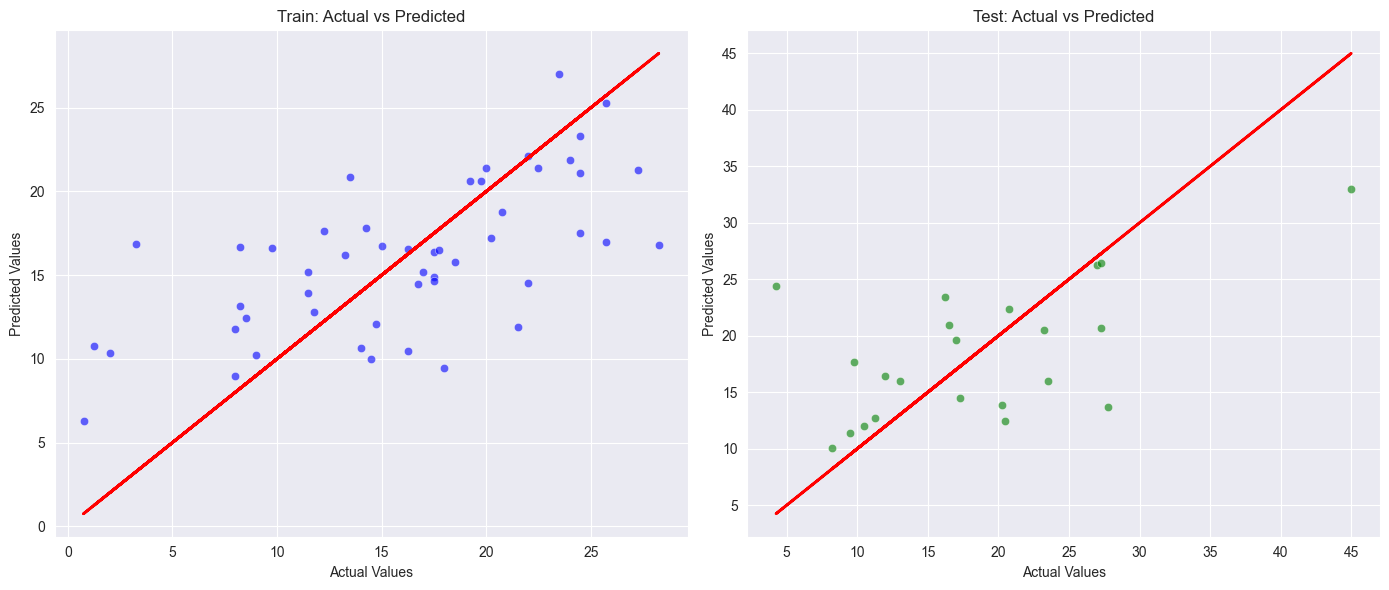

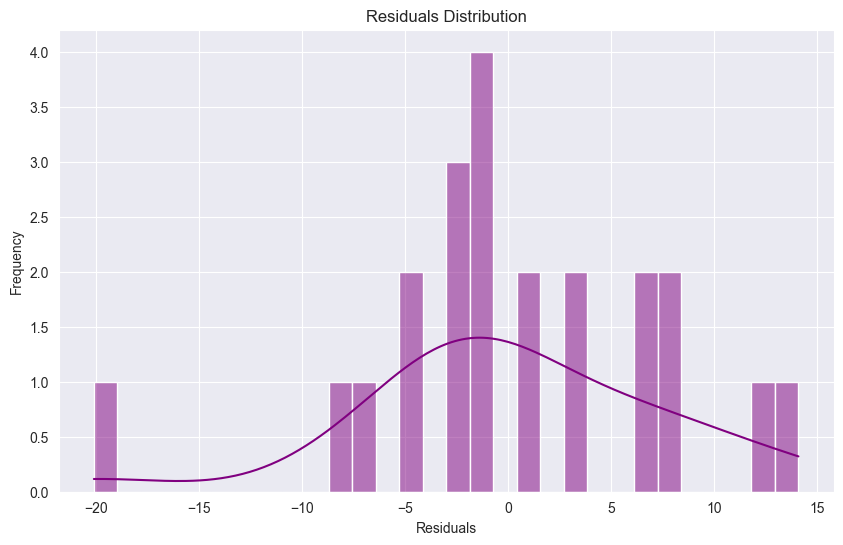

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

col = ['MP', 'FG', 'FGA', '3P', '3PA',
       'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK', '+/-']  #columns used as input
x_col = [f'{num_games}_{i}' for i in col]
X = np.array(full_df[[i for i in x_col]])
y = np.array(full_df[['FP']])

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.7, shuffle=False)

y_train = y_train.ravel()
y_test = y_test.ravel()

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

#initialize object
linear = LinearRegression()

evaluate_regression_model(linear, X_train_scaled, y_train, X_test_scaled, y_test)

Train MAE: 1.8898
Test MAE: 5.2101
Train MSE: 5.8859
Test MSE: 55.4639
Train RMSE: 2.4261
Test RMSE: 7.4474
Train R²: 0.8748
Test R²: 0.2989


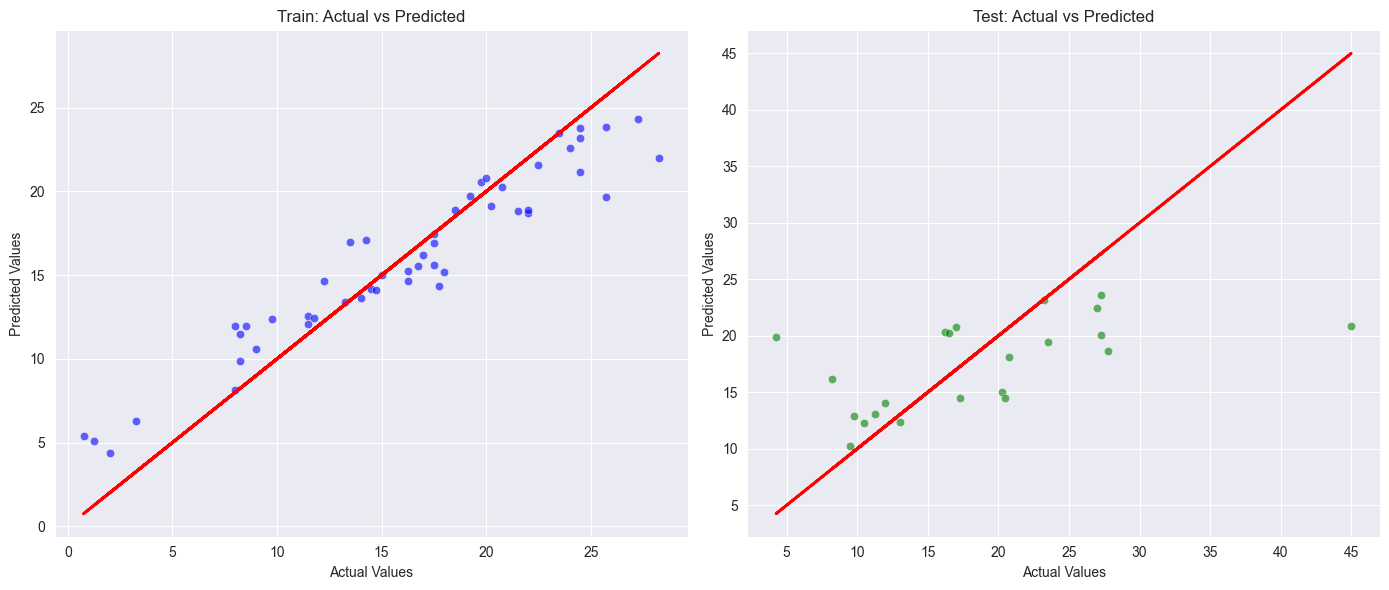

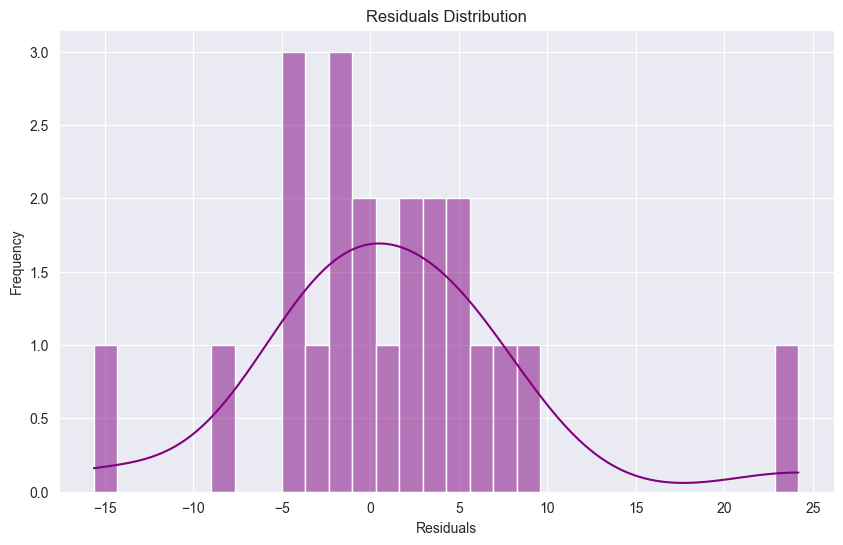

In [50]:
from sklearn.ensemble import RandomForestRegressor


x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.7, shuffle=False)
y_train = y_train.ravel()
y_test = y_test.ravel()
rf = RandomForestRegressor(random_state=42)

evaluate_regression_model(rf, x_train, y_train, x_test, y_test)

Train MAE: 2.2505
Test MAE: 5.3898
Train MSE: 7.9820
Test MSE: 57.9277
Train RMSE: 2.8252
Test RMSE: 7.6110
Train R²: 0.8302
Test R²: 0.2678


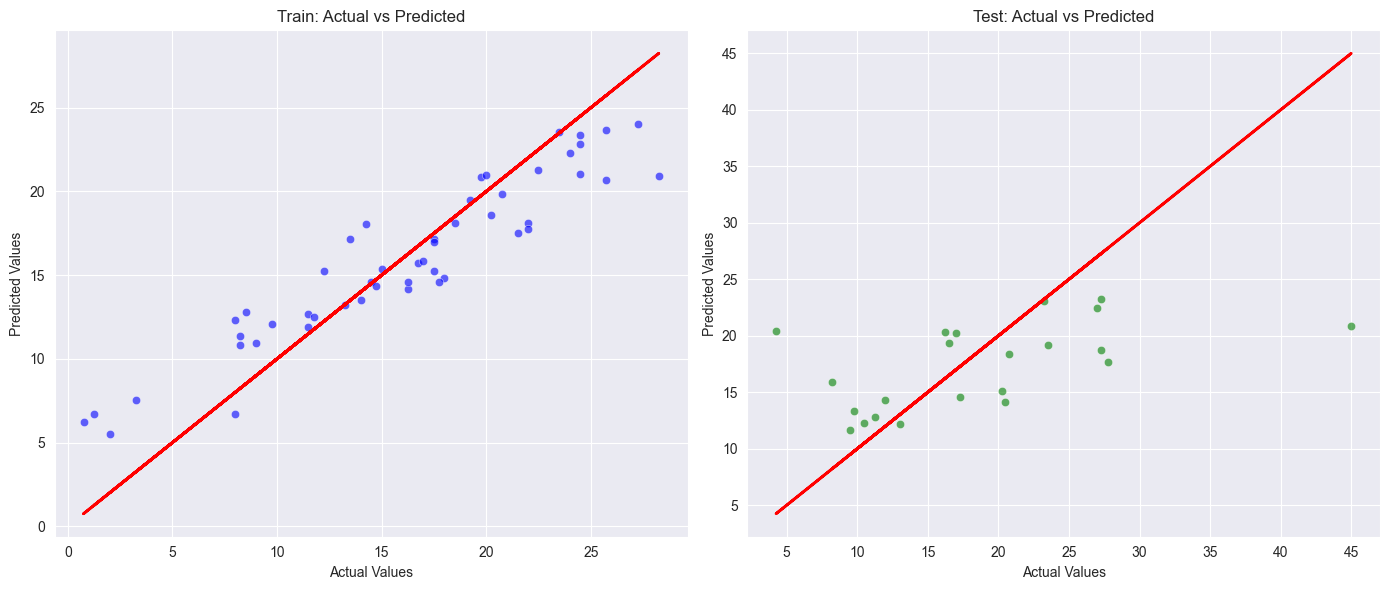

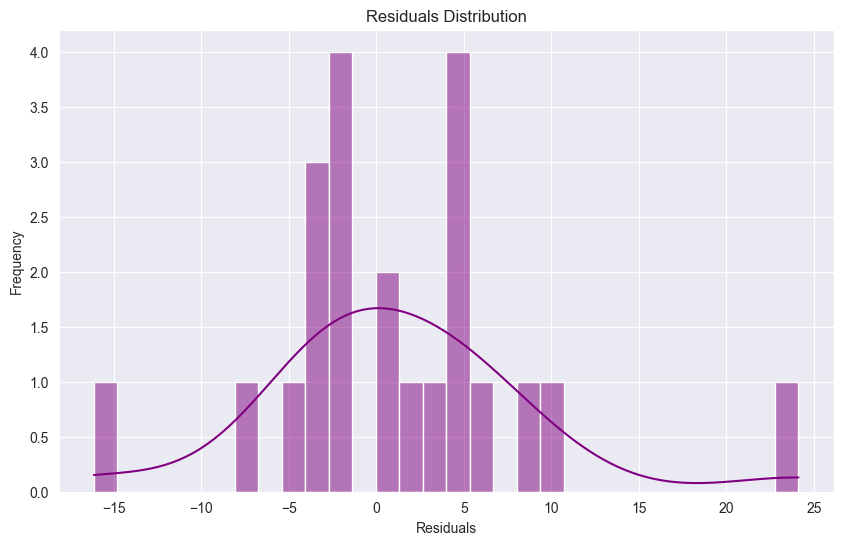

In [51]:
rf = RandomForestRegressor(
    n_estimators=200, 
    max_depth=10, 
    min_samples_split=5, 
    random_state=42
)

evaluate_regression_model(rf, x_train, y_train, x_test, y_test)

Train MAE: 0.0000
Test MAE: 7.2159
Train MSE: 0.0000
Test MSE: 92.7244
Train RMSE: 0.0000
Test RMSE: 9.6294
Train R²: 1.0000
Test R²: -0.1721


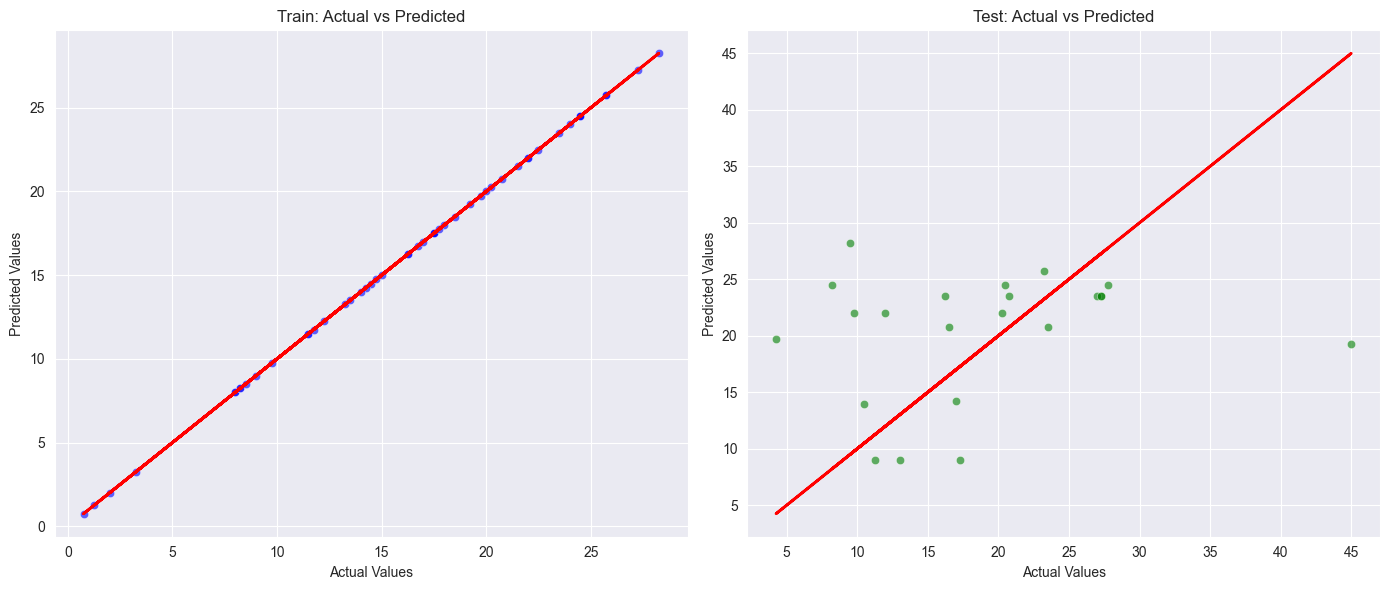

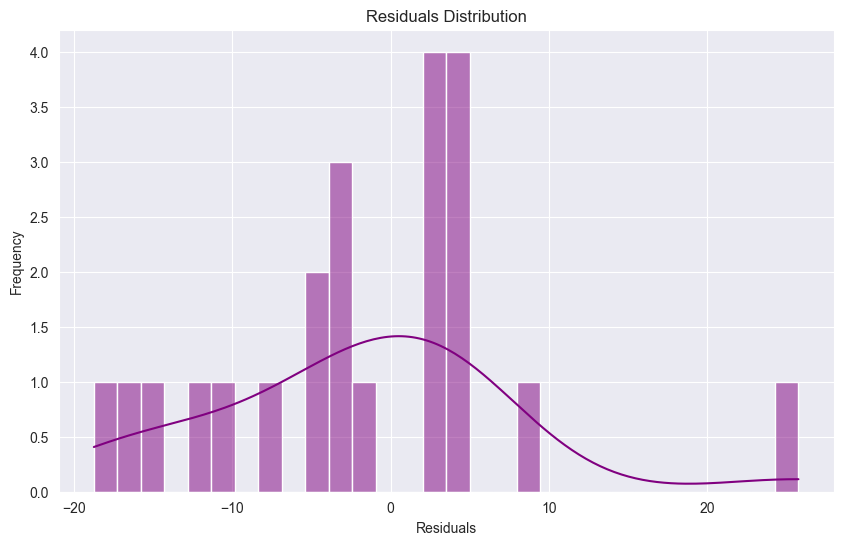

In [53]:
from sklearn.tree import DecisionTreeRegressor

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.7, shuffle=False)
y_train = y_train.ravel()
y_test = y_test.ravel()
rf = DecisionTreeRegressor(random_state=42)

evaluate_regression_model(rf, x_train, y_train, x_test, y_test)